In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import FiniteSpace_Examples as FE
import FiniteSpaces_Class as FS
import Brute_gcat as B

In [2]:
# Tim's example that doesn't have an assignment 

def NAE(*fs):
	fa = And(*fs)
	fo = Or(*fs)
	return lambda A:not fa(A) and fo(A)

def And(*fs): return lambda A:all(f(A) for f in fs)
def Or(*fs):  return lambda A:any(f(A) for f in fs)
def Not(f):   return lambda A:not f(A)
def Var(v):   return lambda A:A[v]

a = Var('a')
b = Var('b')
c = Var('c')
_a = Not(a)
_b = Not(b)
_c = Not(c)

F = And(
	NAE(_a,_b,_c),
	NAE(_a,_b, c),
	NAE(_a, b,_c),
	NAE(_a, b, c),
	# NAE( a,_b,_c),
	# NAE( a,_b, c),
	# NAE( a, b,_c),
	# NAE( a, b, c),
)

def ev(f,**A):
	print(A)
	return f(A)

for i in range(2**3):
	A = {'a':i>>2&1,'b':i>>1&1,'c':i&1}
	print(A,F(A))

{'a': 0, 'b': 0, 'c': 0} False
{'a': 0, 'b': 0, 'c': 1} False
{'a': 0, 'b': 1, 'c': 0} False
{'a': 0, 'b': 1, 'c': 1} False
{'a': 1, 'b': 0, 'c': 0} False
{'a': 1, 'b': 0, 'c': 1} False
{'a': 1, 'b': 1, 'c': 0} False
{'a': 1, 'b': 1, 'c': 1} False


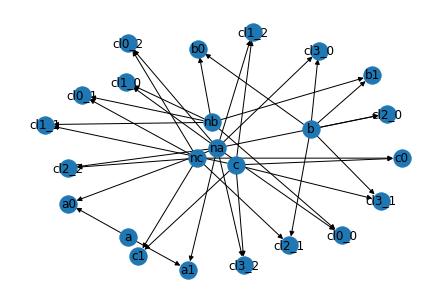

In [3]:
# Trying to build the Hasse diagram for the reduction construction 

verts = ['a','b','c','na','nb','nc']
clauses = [ ('na', 'nb', 'nc'), ('na', 'nb', 'c'), ('na', 'b', 'nc'), ('na', 'b', 'c')]

H = nx.DiGraph()
H.add_nodes_from(verts)

for var in ['a','b','c']:
    nvar = 'n' + var
    H.add_nodes_from([var+'0',var+'1'])
    H.add_edge(var,  var+'0')
    H.add_edge(nvar, var+'0')
    H.add_edge(nvar, var+'1')
    H.add_edge(var,  var+'1')

for i, c in enumerate(clauses):
    H.add_nodes_from(['cl'+str(i)+'_'+str(j) for j in range(3)])
    H.add_edges_from([(c[0],'cl'+str(i)+'_0'),(c[0],'cl'+str(i)+'_2')])
    H.add_edges_from([(c[1],'cl'+str(i)+'_0'),(c[1],'cl'+str(i)+'_1')])
    H.add_edges_from([(c[2],'cl'+str(i)+'_1'),(c[2],'cl'+str(i)+'_2')])

nx.draw(H, with_labels = True)

In [8]:
F = FS.FiniteSpace(H)
F

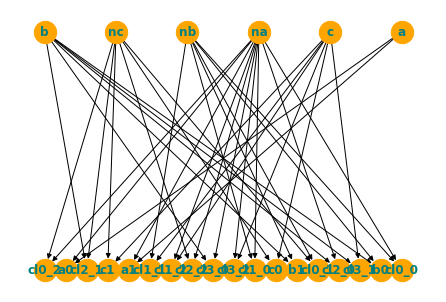

In [9]:
F.drawHasse()

In [6]:
len(F.shuffleCatCover(randomizeStart = True,randomizeStyle = "BFS-random",verbose = True))

Using BFS
Starting max is nc
Using random BFS
['na' 'nb' 'c' 'b' 'a']


3

In [7]:
B.get_brute_gcat(F, verbose = True)

Checking partitions of size 6 while gc = 6
[['nc'], ['c'], ['b'], ['a'], ['nb'], ['na']]
	Found cover of size 6
Checking partitions of size 5 while gc = 6
[['nc'], ['c', 'b'], ['a'], ['nb'], ['na']]
	Found cover of size 5
Checking partitions of size 4 while gc = 5
[['nc', 'b'], ['c', 'nb'], ['a'], ['na']]
	Found cover of size 4
Checking partitions of size 3 while gc = 4
k has decreased twice to 2  without improving gc, which is 4 ... exiting


4